In [1]:
pip install pandas

In [2]:
pip install numpy

In [3]:
pip install requires.io

In [4]:
pip install matplotlib

In [5]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

ur1 = 'https://github.com/amankharwal/Website-data/raw/master/database.csv'
s=requests.get(ur1).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data

Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square            ID  Source  \
0                   NaN               NaN  ISCGEM860706  ISCGEM   
1                   NaN               NaN  ISCGEM860737  ISCGEM   
2                   NaN               NaN  ISCGEM860762  ISCGEM   
3                   NaN               NaN  ISCGEM860856  ISCGEM   
4                   NaN               NaN  ISCGEM860890  ISCGEM   
...                 ...               ...           ...     ...   
23407               NaN            0.1898    NN00570710      NN   
23408               NaN            0.2187    NN00570744      NN   
23409               4.8            1.5200    US10007NAF      US   
23410               6.0            1.4300    US10007NL0      US   
23411               4.5            0.9100    US10007NTD      US   

      Location Source Magnitude Source     Status  
0              ISCGEM           ISCGEM  Automatic  
1              ISCGEM           ISCGEM  Automatic  
2              ISCGEM           ISCGEM  Automatic  
3              ISCGEM           ISCGEM  Automatic  
4              ISCGEM           ISCGEM  Automatic  
...               ...              ...        ...  
23407              NN               NN   Reviewed  
23408              NN               NN   Reviewed  
23409              US               US   Reviewed  
23410              US

In [6]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

Date      Time  Latitude  Longitude  Depth  Magnitude
0  01/02/1965  13:44:18    19.246    145.616  131.6        6.0
1  01/04/1965  11:29:49     1.863    127.352   80.0        5.8
2  01/05/1965  18:05:58   -20.579   -173.972   20.0        6.2
3  01/08/1965  18:49:43   -59.076    -23.557   15.0        5.8
4  01/09/1965  13:32:50    11.938    126.427   15.0        5.8

In [7]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

<ipython-input-7-2a70f8d0d702>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = timeStamp.values


Latitude  Longitude  Depth  Magnitude    Timestamp
0    19.246    145.616  131.6        6.0 -157630542.0
1     1.863    127.352   80.0        5.8 -157465811.0
2   -20.579   -173.972   20.0        6.2 -157355642.0
3   -59.076    -23.557   15.0        5.8 -157093817.0
4    11.938    126.427   15.0        5.8 -157026430.0

In [8]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


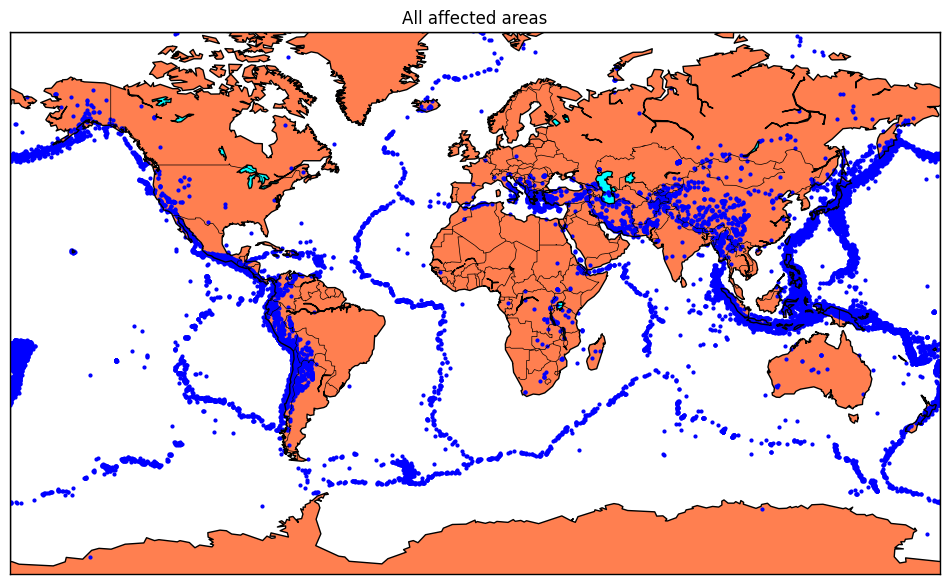

In [9]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [10]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 91.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)
X_train

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


array([[ 0.8062397 , -0.07799899,  0.75521961],
       [ 0.63595389, -0.47145378,  1.01425419],
       [-0.32923659,  0.21377125, -0.62184971],
       ...,
       [-0.91167955, -0.27143874,  0.71491277],
       [-1.73281206, -0.23736677,  0.90534844],
       [ 0.63502768,  0.51653351, -1.12249427]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [22]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [128,64]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [20]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

<ipython-input-22-80765e87540b>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
pip install --upgrade scikit-learn

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
pip install tensor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
  Created wheel for tensor: filename=tensor-0.3.6-py3-none-any.whl size=71551 sha256=2140a5e99dac1c5603c0565a5f5d67ae5f99797d974ad51bdd30860258a14bc5
  Stored in directory: /root/.cache/pip/wheels/b

In [18]:
pip install tensorflow

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [20]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
X_test = np.asarray(X_test).astype('float32')
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/10
1873/1873 [==============================] - 6s 3ms/step - loss: 0.0038 - accuracy: 0.4154 - val_loss: 0.0039 - val_accuracy: 0.4255
Epoch 2/10
1873/1873 [==============================] - 12s 6ms/step - loss: 0.0038 - accuracy: 0.4194 - val_loss: 0.0039 - val_accuracy: 0.4287
Epoch 3/10
1873/1873 [==============================] - 11s 6ms/step - loss: 0.0038 - accuracy: 0.4221 - val_loss: 0.0039 - val_accuracy: 0.4321
Epoch 4/10
1873/1873 [==============================] - 12s 6ms/step - loss: 0.0038 - accuracy: 0.4265 - val_loss: 0.0039 - val_accuracy: 0.4383
Epoch 5/10
1873/1873 [==============================] - 11s 6ms/step - loss: 0.0038 - accuracy: 0.4364 - val_loss: 0.0039 - val_accuracy: 0.4485
Epoch 6/10
1873/1873 [==============================] - 10s 5ms/step - loss: 0.0038 - accuracy: 0.4457 - val_loss: 0.0039 - val_accuracy: 0.4586
Epoch 7/10
1080/1873 [================>.............] - ETA: 2s - loss: 0.0040 - accuracy: 0.4567

KeyboardInterrupt: ignored